# **Publisher Analysis**

---
---

### **Setup & Load the Data**
---

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import pytz
from IPython.display import display
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns

In [3]:
# Load a CSV file from your local file system
df = pd.read_csv('C:/Users/Admin/OneDrive/10 Academy/Week 1/Technical Content/Data/raw_analyst_ratings_cleaned.csv')
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A


---
### **Top Publishers and Email-domains:**

In [4]:
# Identify unique publishers
unique_publishers = df['publisher'].unique()
print(f"Number of unique publishers: {len(unique_publishers)}")
print("Sample unique publishers:", unique_publishers[:10])

# Extract email domain patterns if publisher is an email address
email_pattern = r'[\w\.-]+@([\w\.-]+)'
df['publisher_domain'] = df['publisher'].apply(
    lambda x: re.search(email_pattern, str(x)).group(1) if re.search(email_pattern, str(x)) else None
)

# Assess publisher distribution
publisher_counts = df['publisher'].value_counts()
print("\nTop 10 publishers by article count:")
print(publisher_counts.head(10))

# Assess email domain distribution
domain_counts = df['publisher_domain'].value_counts().dropna()
print("\nTop 10 email domains by article count:")
print(domain_counts.head(10))

Number of unique publishers: 225
Sample unique publishers: ['Benzinga Insights' 'Lisa Levin' 'Vick Meyer' 'vishwanath@benzinga.com'
 'Benzinga Newsdesk' 'Benzinga\u2003Newsdesk' 'ETF Professor'
 'Luke J Jacobi' 'Benzinga_Newsdesk' 'Tanzeel Akhtar']

Top 10 publishers by article count:
publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
Benzinga Insights     2332
Vick Meyer            2128
Charles Gross         1790
Hal Lindon            1470
Benzinga_Newsdesk     1239
Name: count, dtype: int64

Top 10 email domains by article count:
publisher_domain
benzinga.com    1196
gmail.com          3
Name: count, dtype: int64


### **Summary of Publisher and Domain Analysis**

- The dataset contains 55,987 articles, each with details such as headline, URL, publisher, date, stock, and extracted publisher domain.
- There are 225 unique publishers, with the most frequent being "Benzinga Newsdesk" and "Lisa Levin".
- Publisher domains were extracted from email addresses in the `publisher` field. However, only 1,199 entries have a non-null `publisher_domain`.
- The vast majority of articles with a domain are from `benzinga.com` (1,196 articles), with a small number from `gmail.com` (3 articles).
- This indicates that most publishers are listed by name rather than email, and the dataset is heavily dominated by a single source.

----

### **Visualization for the top 10 publishers and top 10 email domains by article count**

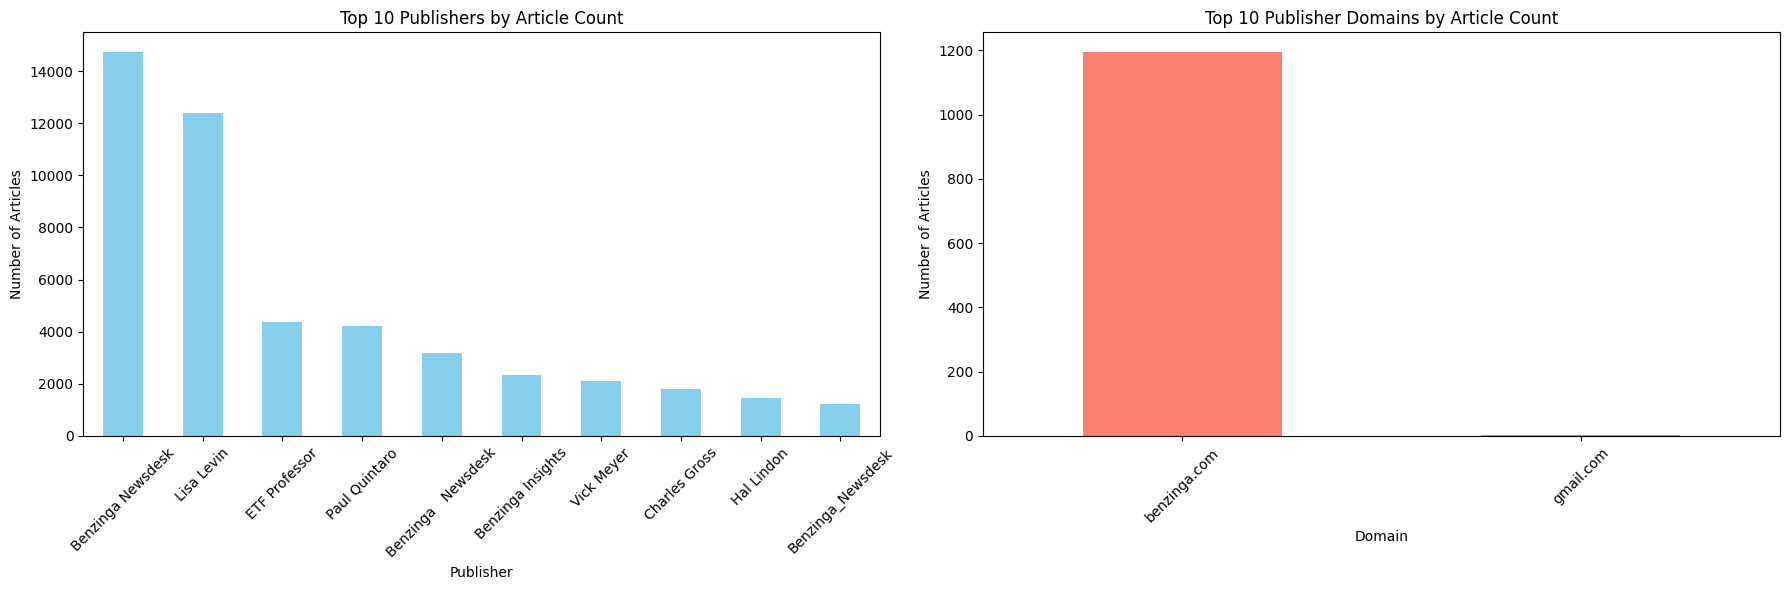

In [5]:
# Visualize the top 10 publishers and top 10 email domains by article count

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top 10 publishers
publisher_counts.head(10).plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 Publishers by Article Count')
axes[0].set_ylabel('Number of Articles')
axes[0].set_xlabel('Publisher')
axes[0].tick_params(axis='x', rotation=45)

# Top 10 email domains
domain_counts.head(10).plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Top 10 Publisher Domains by Article Count')
axes[1].set_ylabel('Number of Articles')
axes[1].set_xlabel('Domain')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()